# Linear Algebra Tutorial

Based on Chapter 4 for Data Science from Scratch Book by Joel Grus with code from https://github.com/joelgrus/data-science-from-scratch

In [1]:
# resources for the rest of the page
from __future__ import division # want 3 / 2 == 1.5
import re, math, random # regexes, math functions, random numbers
import matplotlib.pyplot as plt # pyplot
from collections import defaultdict, Counter
from functools import partial

## Simple vector operations

Vectors can be thought of a as representation of a single point in multi-dimensional space.

Vectors are objects that can be added together to form new vectors or multiplied by scalars to form new vectors.  

If we have the height, weight, and age data for a large number of people then we can treat the data as a  3-d vector using [height, weight, age].

In [2]:
john = [72,  #inches
        195, #pound
        32]  #years
mary = [53,  #inches
        105, #pounds
        28]  #years

Vector addition requires that the dimensionality of the vectors is the same other wise it fails.
So if we add v + w then each element v(x) + v(x) with x=0,1,...N-1 must have a value in both the vectors for the addition to be successful.
Lists are not really vectors so we need to create them our selves.

## Functions for working with vectors

In [3]:
def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

In [4]:
x=[1,2]
y=[2,1]
vector_add(x,y)

[3, 3]

In [5]:
vector_subtract(x,y)

[-1, 1]

In [6]:
vlist=[x,y,x,y]
vector_sum(vlist)

[6, 6]

In [7]:
scalar_multiply(10,x)

[10, 20]

### this isn't right if you don't -- from \_\_future\_ import division

In [8]:
def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

vector_mean(vlist)


[1.5, 1.5]

In [9]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

dot(x,x)

5

In [10]:
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

sum_of_squares(x)

5

In [11]:
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

magnitude(x)

2.23606797749979

In [12]:
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

squared_distance(x,y)

2

In [13]:
def distance(v, w):
   return math.sqrt(squared_distance(v, w))

distance(x,x)

0.0

## Demonstration of show 2d vectors on a graph

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline  
def plot_2D_vectors(tupleof2dvectors,xlim_in,ylim_in):
    """plot_2d_vectors pass in the 2d vectors and axes object and x and y limits """
    fig, ax = plt.subplots(figsize=(10, 8))    
# Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')
    vecs = tupleof2dvectors
    
    ax.set(xlim=xlim_in, ylim=ylim_in)
    ax.grid()
    
    for v in vecs:
        ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.7,
                width=0.5))
        ax.text(1.1 * v[0], 1.1 * v[1], str(v))
  

In [91]:
x=[-1,4]
y=[2,4]
z=[1,-3]
vt=(x,y,z)


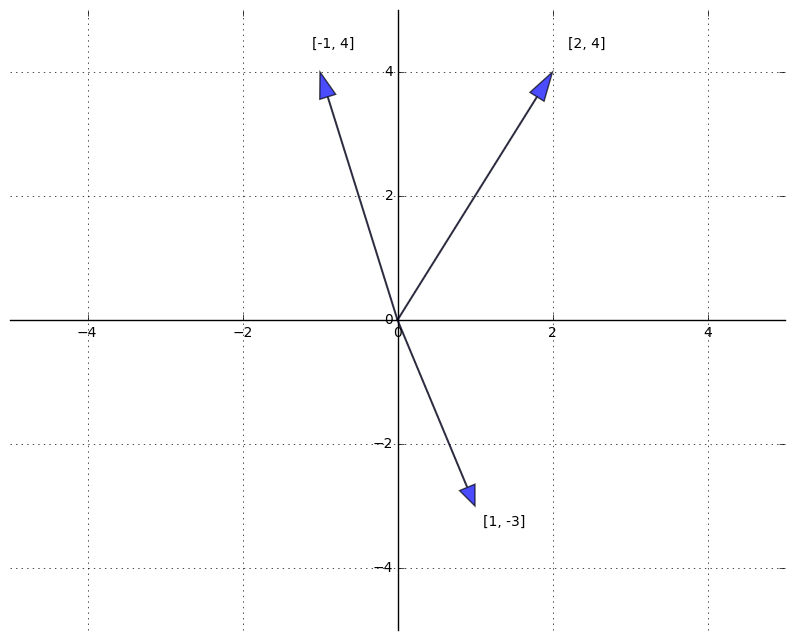

In [92]:


plot_2D_vectors(vt,(-5,5),(-5,5))
plt.show()


## Functions for working with matrices

Definition of terms for matrix
https://en.wikipedia.org/wiki/Matrix_(mathematics)

A matrix (plural: matrices) is a rectangular array of numbers, symbols, or expressions, arranged in rows and columns.


In [94]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

def get_row(A, i):
    return A[i]
    
def get_column(A, j):
    return [A_i[j] for A_i in A]

def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix 
    whose (i,j)-th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) for j in range(num_cols)]
            for i in range(num_rows)]  

def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0

In [95]:
identity_matrix = make_matrix(5, 5, is_diagonal)
print "identity_matrix =" + str(identity_matrix)

identity_matrix =[[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]]


## Using matrix manipulation

In [96]:
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
               [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1
               [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2
               [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3
               [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4
               [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7
               [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9
identity_matrix_10 = make_matrix(10, 10, is_diagonal)

In [97]:
def matrix_add(A, B):
    if shape(A) != shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")
        
    num_rows, num_cols = shape(A)
    def entry_fn(i, j): return A[i][j] + B[i][j]
        
    return make_matrix(num_rows, num_cols, entry_fn)

matrix_add(friendships,identity_matrix_10)

[[1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]

In [103]:
def make_graph_dot_product_as_vector_projection(plt):

    v = [2, 1]
    w = [math.sqrt(.25), math.sqrt(.75)]
    c = dot(v, w)
    vonw = scalar_multiply(c, w)
    o = [0,0]
    fig, ax = plt.subplots(figsize=(10, 8)) 
    plt.arrow(0, 0, v[0], v[1], 
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("v", v, xytext=[v[0] + 0.1, v[1]])
    plt.arrow(0 ,0, w[0], w[1], 
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("w", w, xytext=[w[0] - 0.1, w[1]])
    plt.arrow(0, 0, vonw[0], vonw[1], length_includes_head=True)
    plt.annotate(u"(v•w)w", vonw, xytext=[vonw[0] - 0.1, vonw[1] + 0.1])
    plt.arrow(v[0], v[1], vonw[0] - v[0], vonw[1] - v[1], 
              linestyle='dotted', length_includes_head=True)
    plt.scatter(*zip(v,w,o),marker='.')
    plt.axis('equal')
    plt.show()
    


Scalar multiplication of V=[2,1] * scalar 1.86602540378 is [0.9330127018922193, 1.6160254037844386]


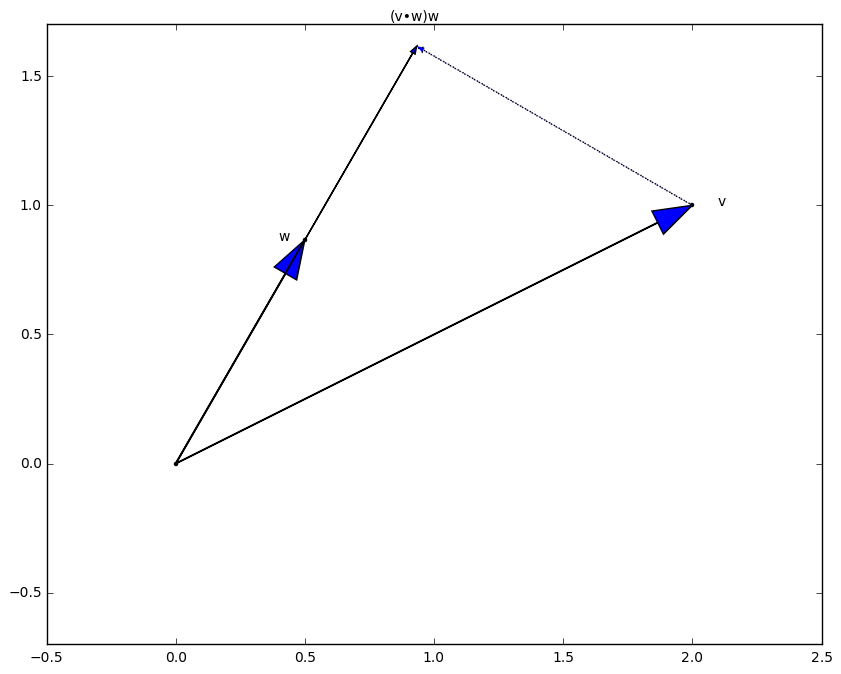

In [106]:
v = [2, 1]
w = [math.sqrt(.25), math.sqrt(.75)]
c = dot(v, w)
print   "Scalar multiplication of V=[2,1] * scalar "+ str(c) + " is " + str(scalar_multiply(c, w))
    
make_graph_dot_product_as_vector_projection(plt)